In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
cars_data=pd.read_csv('/content/CarPrice_Assignment.csv')



  

In [ ]:
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
172,2,1,0,2,0,2,0,98.4,176.2,65.6,53.0,2975,3,2,146,5,3.62,3.50,9.3,116,4800,24,30,17669.0
74,1,1,0,2,1,2,0,112.0,199.2,72.0,55.4,3715,5,0,304,5,3.80,3.35,8.0,184,4500,14,16,45400.0
19,1,1,0,2,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.6,70,5400,38,43,6295.0
95,1,1,0,2,2,1,0,94.5,165.6,63.8,53.3,2028,3,2,97,1,3.15,3.29,9.4,69,5200,31,37,7799.0
23,1,1,1,2,2,1,0,93.7,157.3,63.8,50.8,2128,3,2,98,5,3.03,3.39,7.6,102,5500,24,30,7957.0


In [ ]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars_data=shuffle(cars_data)
cars_data=cars_data.drop('CarName',axis=1)
cars_data=cars_data.drop('car_ID',axis=1)

In [ ]:
cars_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
172,2,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.30,116,4800,24,30,17669.0
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.00,184,4500,14,16,45400.0
19,1,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0
95,1,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7799.0
23,1,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102,5500,24,30,7957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
32,1,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.10,60,5500,38,42,5399.0
164,1,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2204,ohc,four,98,2bbl,3.19,3.03,9.00,70,4800,29,34,8238.0
115,0,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,3.19,8.40,97,5000,19,24,16630.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cars_data['fueltype']=labelencoder.fit_transform(cars_data['fueltype'])
cars_data['aspiration']=labelencoder.fit_transform(cars_data['aspiration'])
cars_data['doornumber'] = cars_data['doornumber'].map({'two':2,'four':4})
cars_data['carbody']=labelencoder.fit_transform(cars_data['carbody'])
cars_data['drivewheel']=labelencoder.fit_transform(cars_data['drivewheel'])
cars_data['enginelocation']=labelencoder.fit_transform(cars_data['enginelocation'])
cars_data['enginetype']=labelencoder.fit_transform(cars_data['enginetype'])
cars_data['fuelsystem']=labelencoder.fit_transform(cars_data['fuelsystem'])
cars_data['cylindernumber'] = labelencoder.fit_transform(cars_data['cylindernumber'])



In [ ]:
cars_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
172,2,1,0,2,0,2,0,98.4,176.2,65.6,53.0,2975,3,2,146,5,3.62,3.50,9.30,116,4800,24,30,17669.0
74,1,1,0,2,1,2,0,112.0,199.2,72.0,55.4,3715,5,0,304,5,3.80,3.35,8.00,184,4500,14,16,45400.0
19,1,1,0,2,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.60,70,5400,38,43,6295.0
95,1,1,0,2,2,1,0,94.5,165.6,63.8,53.3,2028,3,2,97,1,3.15,3.29,9.40,69,5200,31,37,7799.0
23,1,1,1,2,2,1,0,93.7,157.3,63.8,50.8,2128,3,2,98,5,3.03,3.39,7.60,102,5500,24,30,7957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3,1,0,2,2,1,0,99.1,186.6,66.5,56.1,2658,3,2,121,5,3.54,3.07,9.31,110,5250,21,28,11850.0
32,1,1,0,2,2,1,0,93.7,150.0,64.0,52.6,1837,3,2,79,0,2.91,3.07,10.10,60,5500,38,42,5399.0
164,1,1,0,2,2,2,0,94.5,168.7,64.0,52.6,2204,3,2,98,1,3.19,3.03,9.00,70,4800,29,34,8238.0
115,0,1,0,4,3,2,0,107.9,186.7,68.4,56.7,3075,2,2,120,5,3.46,3.19,8.40,97,5000,19,24,16630.0


In [ ]:
train_data=cars_data.iloc[:103]
train_targets=cars_data.price.iloc[:103]
train_targets=np.asarray(train_targets)
train_data.drop('price',axis=1,inplace=True)


print(train_data.shape)

test_data=cars_data.iloc[103:166]
test_targets=cars_data.price.iloc[103:166]
test_targets=np.asarray(test_targets)
test_data.drop('price',axis=1,inplace=True)


print(test_data.shape)

(103, 23)
(63, 23)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
104,3,1,0,2,2,2,0,91.3,170.7,67.9,49.7,3071,5,3,181,5,3.43,3.27,9.0,160,5200,19,25
178,3,1,0,2,2,2,0,102.9,183.5,67.7,52.0,2976,0,3,171,5,3.27,3.35,9.3,161,5200,20,24
96,1,1,0,4,3,1,0,94.5,165.3,63.8,54.5,1971,3,2,97,1,3.15,3.29,9.4,69,5200,31,37
156,0,1,0,4,3,1,0,95.7,166.3,64.4,53.0,2081,3,2,98,1,3.19,3.03,9.0,70,4800,30,37
97,1,1,0,4,4,1,0,94.5,170.2,63.8,53.5,2037,3,2,97,1,3.15,3.29,9.4,69,5200,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2,1,0,2,1,2,0,98.4,176.2,65.6,52.0,2540,3,2,146,5,3.62,3.50,9.3,116,4800,24,30
170,2,1,0,2,1,2,0,98.4,176.2,65.6,52.0,2679,3,2,146,5,3.62,3.50,9.3,116,4800,24,30
113,0,1,0,4,4,2,0,114.2,198.9,68.4,56.7,3285,2,2,120,5,3.46,2.19,8.4,95,5000,19,24
203,-1,0,1,4,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [ ]:

val_data=cars_data.iloc[166:]
val_data.drop('price',axis=1,inplace=True)

val_targets=cars_data.price.iloc[166:]
val_targets=np.asarray(val_targets)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
val_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
94,1,1,0,2,3,1,0,94.5,165.3,63.8,54.5,1951,3,2,97,1,3.15,3.29,9.4,69,5200,31,37
154,0,1,0,4,4,0,0,95.7,169.7,63.6,59.1,2290,3,2,92,1,3.05,3.03,9.0,62,4800,27,32
72,3,1,0,2,0,2,0,96.6,180.3,70.5,50.8,3685,5,0,234,5,3.46,3.10,8.3,155,4750,16,18
20,0,1,0,4,3,1,0,94.5,158.8,63.6,52.0,1909,3,2,90,1,3.03,3.11,9.6,70,5400,38,43
31,2,1,0,2,2,1,0,86.6,144.6,63.9,50.8,1819,3,2,92,0,2.91,3.41,9.2,76,6000,31,38


In [ ]:
train_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
172,2,1,0,2,0,2,0,98.4,176.2,65.6,53.0,2975,3,2,146,5,3.62,3.50,9.3,116,4800,24,30
74,1,1,0,2,1,2,0,112.0,199.2,72.0,55.4,3715,5,0,304,5,3.80,3.35,8.0,184,4500,14,16
19,1,1,0,2,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.6,70,5400,38,43
95,1,1,0,2,2,1,0,94.5,165.6,63.8,53.3,2028,3,2,97,1,3.15,3.29,9.4,69,5200,31,37
23,1,1,1,2,2,1,0,93.7,157.3,63.8,50.8,2128,3,2,98,5,3.03,3.39,7.6,102,5500,24,30


In [ ]:
train_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [ ]:
test_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [ ]:
val_data.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [ ]:
train_data.iloc[1].shape

(23,)

In [ ]:

model = models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(train_data.iloc[1].shape)))
model.add(layers.Dropout(0.5))

#model.add(layers.Dropout(0.5))

model.add(layers.Dense(5,kernel_regularizer=regularizers.l2(0.01),activation='relu'))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
his=model.fit(train_data,train_targets,epochs=500,batch_size=1,validation_data=(val_data,val_targets))

Epoch 1/500
103/103 [==============================] - 1s 4ms/step - loss: 247153279.2308 - mae: 13980.7511 - val_loss: 256581264.0000 - val_mae: 13867.1221
Epoch 2/500
103/103 [==============================] - 0s 1ms/step - loss: 292114947.8462 - mae: 14134.1217 - val_loss: 246892416.0000 - val_mae: 13520.7803
Epoch 3/500
103/103 [==============================] - 0s 1ms/step - loss: 234398912.6154 - mae: 12229.2272 - val_loss: 221037456.0000 - val_mae: 12630.7188
Epoch 4/500
103/103 [==============================] - 0s 1ms/step - loss: 186795179.3077 - mae: 11065.3775 - val_loss: 175165360.0000 - val_mae: 10703.4082
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 146824402.2692 - mae: 8852.7806 - val_loss: 129912344.0000 - val_mae: 8381.7090
Epoch 6/500
103/103 [==============================] - 0s 2ms/step - loss: 129946548.4231 - mae: 7266.9596 - val_loss: 101692944.0000 - val_mae: 6772.9272
Epoch 7/500
103/103 [==============================] - 0s 1ms/

In [ ]:
model.evaluate(test_data,test_targets)

2/2 [==============================] - 0s 4ms/step - loss: 48274180.0000 - mae: 5792.1240


[48274180.0, 5792.1240234375]

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                240       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
his.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

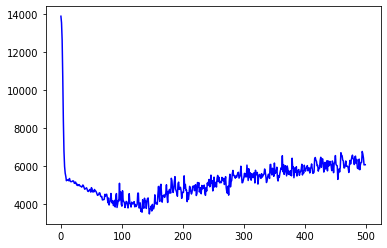

In [ ]:
import matplotlib.pyplot as plt

valmae=his.history['val_mae']
epochs=range(500)
plt.plot(epochs,valmae,'b',label='val mae')


In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(train_data.iloc[1].shape)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
his=model.fit(train_data,train_targets,epochs=150,batch_size=1,validation_data=(val_data,val_targets))

Epoch 1/150
103/103 [==============================] - 1s 3ms/step - loss: 245817438.4615 - mae: 12818.2854 - val_loss: 259022272.0000 - val_mae: 13955.4629
Epoch 2/150
103/103 [==============================] - 0s 1ms/step - loss: 259859681.0769 - mae: 13670.1478 - val_loss: 243248496.0000 - val_mae: 13402.6250
Epoch 3/150
103/103 [==============================] - 0s 2ms/step - loss: 233291645.3846 - mae: 12519.3447 - val_loss: 221454592.0000 - val_mae: 12605.5850
Epoch 4/150
103/103 [==============================] - 0s 1ms/step - loss: 263567357.9423 - mae: 12861.4339 - val_loss: 191980752.0000 - val_mae: 11443.5273
Epoch 5/150
103/103 [==============================] - 0s 1ms/step - loss: 141209997.4231 - mae: 9284.3674 - val_loss: 160866384.0000 - val_mae: 10060.8779
Epoch 6/150
103/103 [==============================] - 0s 1ms/step - loss: 171454751.5733 - mae: 8980.9251 - val_loss: 128938984.0000 - val_mae: 8419.7266
Epoch 7/150
103/103 [==============================] - 0s 2ms

In [ ]:
model.evaluate(test_data,test_targets)

2/2 [==============================] - 0s 5ms/step - loss: 21503112.0000 - mae: 2828.9202


[21503112.0, 2828.920166015625]

In [ ]:
pred=model.predict(test_data)
pred[3]

array([6684.5786], dtype=float32)

In [ ]:
test_targets[3]

6938.0